**Library yang Dibutuhkan**

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import scipy as sp

**Import Dataset/Load Dataset**

In [3]:
from google.colab import files
uploades = files.upload()

Saving insurance.csv to insurance.csv


In [4]:
data_df = pd.read_csv('insurance.csv')
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Untuk melihat informasi pada dataset**

In [5]:
#Untuk melihat informasi pada data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**Deskripsi Statistik Data**

In [7]:
data_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Prepocessing Data**

In [8]:
#mengecek missing value
data_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
cat = data_df.select_dtypes(exclude = ['int',float])
print(cat.columns)

Index(['sex', 'smoker', 'region'], dtype='object')


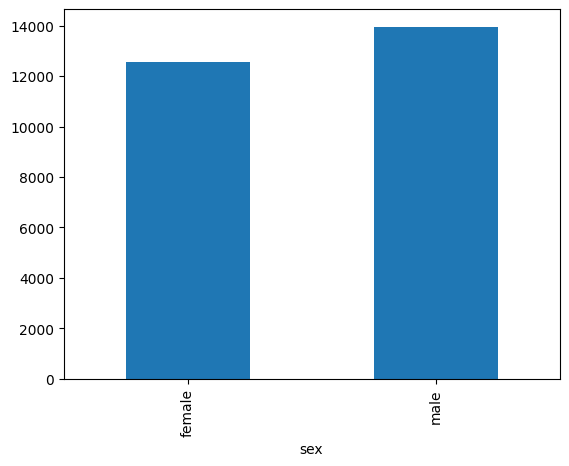

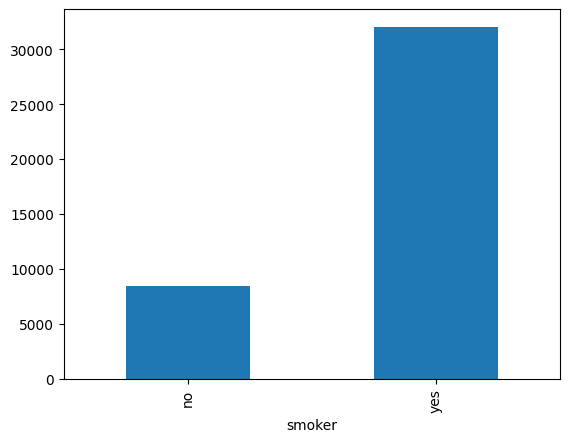

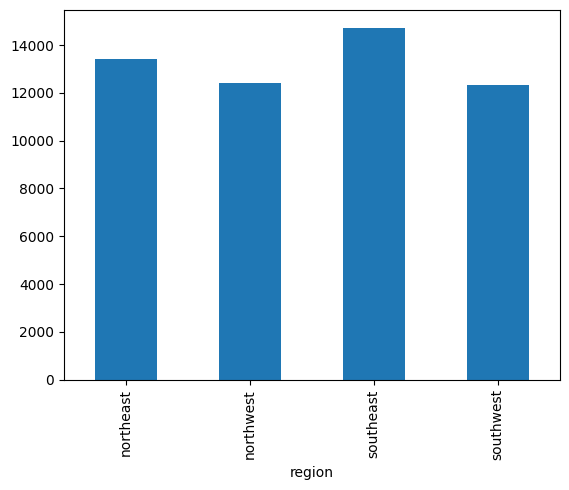

In [11]:
for k in cat:
  if k != 'charges':
    data_df.groupby([k])['charges'].mean().plot.bar()
    plt.show()

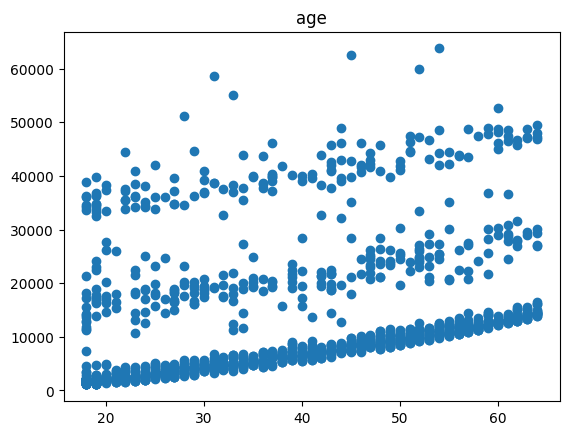

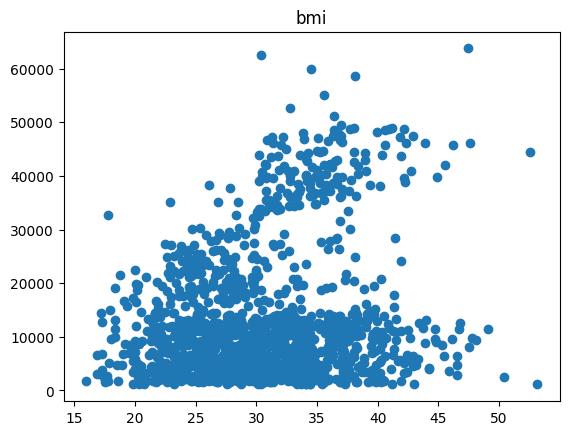

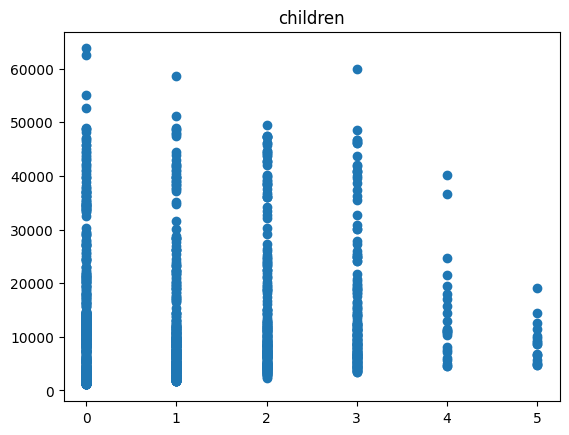

In [12]:
num = data_df.select_dtypes(exclude = ['object'])
for k in num:
  if k != 'charges':
    plt.scatter(data_df[k],data_df['charges'])
    plt.title(k)
    plt.show()

Distribusi Dari Data

<ipython-input-13-4febcbb9559d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['bmi'])


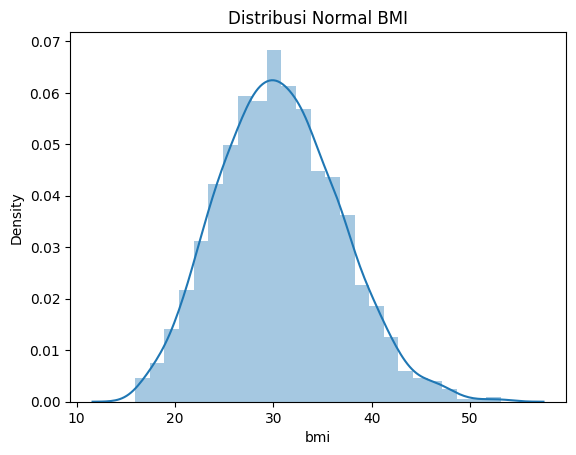

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memplot distribusi normal hanya untuk kolom BMI
sns.distplot(data_df['bmi'])
plt.title('Distribusi Normal BMI')
plt.show()

<ipython-input-14-79d93a273a6c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[k])


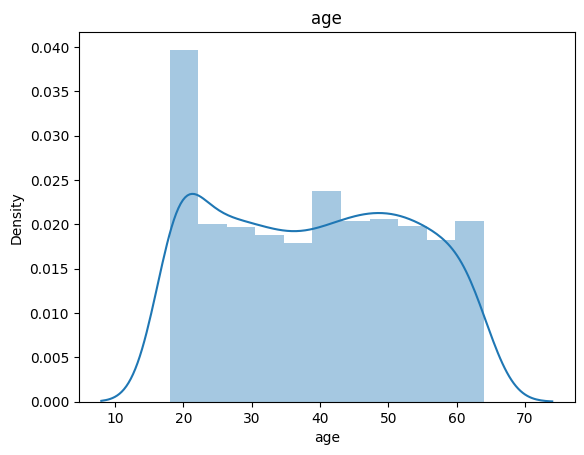

<ipython-input-14-79d93a273a6c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[k])


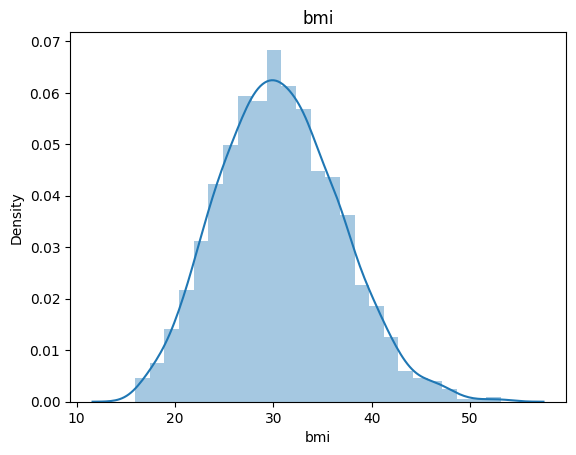

<ipython-input-14-79d93a273a6c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[k])


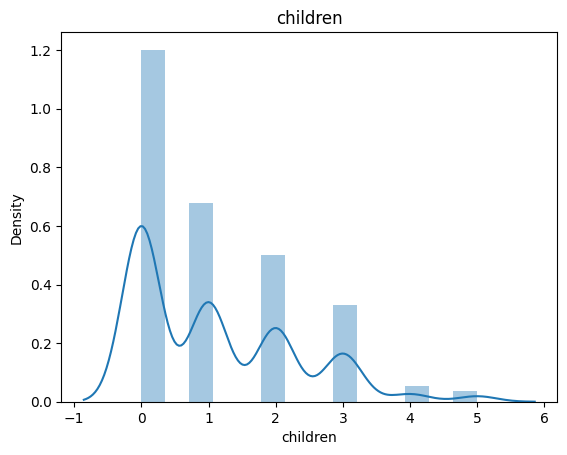

In [14]:
#regresi linier mengasumsikan bahwa data input terdistribusi secara simetris atau normal
for k in num:
  if k != 'charges':
    sns.distplot(data_df[k])
    plt.title(k)
    plt.show()

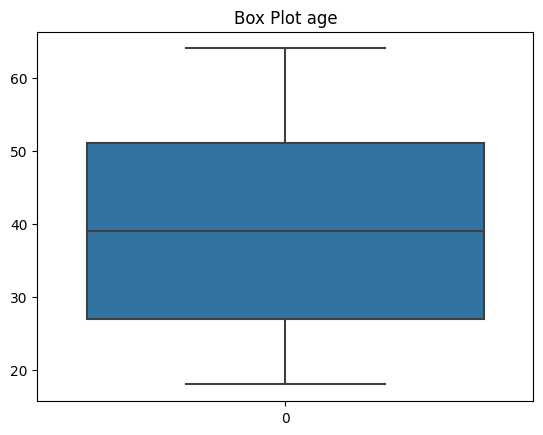

In [15]:
# Membuat box plot dari kolom BMI
sns.boxplot(data_df['age'])
plt.title('Box Plot age')
plt.show()

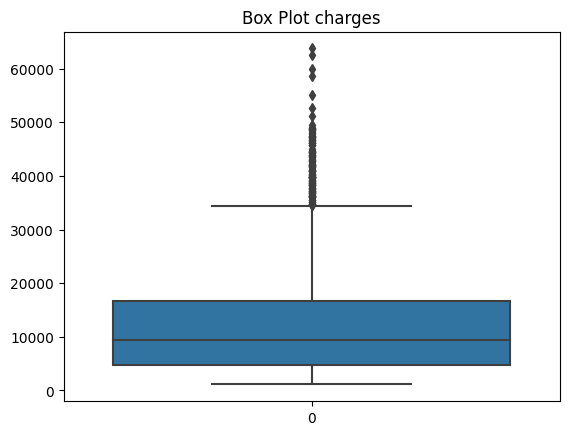

In [16]:
# Membuat box plot dari kolom BMI
sns.boxplot(data_df['charges'])
plt.title('Box Plot charges')
plt.show()

In [17]:
#label encoder untuk data kategorikal [sex,smoker,region]
#Feature Scaling (penskalaan fitur (menormalkan data dan menangani outlier))


data_df[cat.columns].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [18]:
ins = data_df.copy()
ins['sex'] = np.where(ins['sex']=='male',1,0)
ins['smoker'] = np.where(ins['smoker']=='yes',1,0)
ordinal = {k:data_df for data_df,k in enumerate(ins['region'].unique(),0)}
ins['region'] = ins['region'].map(ordinal)
ins[cat.columns].head()

,sex,smoker,region
0,0,1,0
1,1,0,1
2,1,0,1
3,1,0,2
4,1,0,2


In [19]:
ins['region'].unique()

array([0, 1, 2, 3])

In [20]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


Kemudian Feature Selection

In [21]:
#cat dan cont
from sklearn.feature_selection import chi2

In [22]:
feat_cat = ins.drop(num.columns,axis=1)
feat_cat['children'] = ins['children'].values
y = ins['charges'].astype('int')
feat_cat.head()

,sex,smoker,region,children
0,0,1,0,0
1,1,0,1,1
2,1,0,1,3
3,1,0,2,0
4,1,0,2,0


In [23]:
#feature selection menggunakan chi2
chi=chi2(feat_cat,y)
chi

(array([ 655.07248521, 1059.11678832, 1066.60725076, 1752.13651877]),
 array([1.00000000e+00, 9.99998656e-01, 9.99996987e-01, 3.77773444e-17]))

In [24]:
p_values = pd.Series(chi[1])
p_values.index =  feat_cat.columns
p_values

sex         1.000000e+00
smoker      9.999987e-01
region      9.999970e-01
children    3.777734e-17
dtype: float64

In [25]:
feat_num = ins[num.columns]
feat_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [26]:
#korelasi
feat_num.drop('children',axis=1).corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


In [27]:
ins1 = ins[['age','bmi','smoker','children','region','charges']]
ins1.head()

,age,bmi,smoker,children,region,charges
0,19,27.900,1,0,0,16884.92400
1,18,33.770,0,1,1,1725.55230
2,28,33.000,0,3,1,4449.46200
3,33,22.705,0,0,2,21984.47061
4,32,28.880,0,0,2,3866.85520


In [28]:
ins1.corr()

,age,bmi,smoker,children,region,charges
age,1.000000,0.109272,-0.025019,0.042469,-0.002127,0.299008
bmi,0.109272,1.000000,0.003750,0.012759,-0.157566,0.198341
smoker,-0.025019,0.003750,1.000000,0.007673,0.002181,0.787251
children,0.042469,0.012759,0.007673,1.000000,-0.016569,0.067998
region,-0.002127,-0.157566,0.002181,-0.016569,1.000000,0.006208
charges,0.299008,0.198341,0.787251,0.067998,0.006208,1.000000


Kemudian Membangun Model dan Validasi

In [29]:
from sklearn.model_selection import train_test_split

x = ins1.drop(columns=['smoker'])
y = ins1['smoker']

In [30]:
ins1['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [31]:
x

,age,bmi,children,region,charges
0,19,27.900,0,0,16884.92400
1,18,33.770,1,1,1725.55230
2,28,33.000,3,1,4449.46200
3,33,22.705,0,2,21984.47061
4,32,28.880,0,2,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,2,10600.54830
1334,18,31.920,0,3,2205.98080
1335,18,36.850,0,1,1629.83350
1336,21,25.800,0,0,2007.94500


In [32]:
### Random Over Sampling

In [33]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='auto')

x_ros, y_ros = oversample.fit_resample(x, y)

In [34]:
#data traing 70% dan data testing 30%
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1489, 5), (639, 5), (1489,), (639,))

In [35]:
from sklearn.preprocessing import StandardScaler
columns = ['charges','bmi','age']
sc=StandardScaler()

sc_Xtrain=sc.fit_transform(x_train[columns])
sc_Xtest=sc.fit_transform(x_test[columns])

In [36]:
x_train[columns]=sc_Xtrain
x_test[columns]=sc_Xtest

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
dtree_pred = dtree.predict(x_test)
dtree_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

In [39]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
print ('accuracy_score: ',accuracy_score(y_test,dtree_pred))
print ('f1_score: ',f1_score(y_test,dtree_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test,dtree_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test,dtree_pred, pos_label='positive', average='micro'))

accuracy_score:  0.9874804381846636
f1_score:  0.9874804381846636
recall_score:  0.9874804381846636
precision_score:  0.9874804381846636


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [40]:
from sklearn.linear_model import LogisticRegression
# Inisialisasi model regresi logistik multinomial
clf = LogisticRegression(multi_class='auto', solver='lbfgs')

# Melatih model pada data latih
clf.fit(x_train, y_train)

# Melakukan prediksi pada data uji
y_pred = clf.predict(x_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy*100))


Akurasi: 97.81%


In [41]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,

membuat model klastering dengan KMeans

In [42]:
ins1.iloc[:, [0,1,3,4,5,]]

,age,bmi,children,region,charges
0,19,27.900,0,0,16884.92400
1,18,33.770,1,1,1725.55230
2,28,33.000,3,1,4449.46200
3,33,22.705,0,2,21984.47061
4,32,28.880,0,2,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,2,10600.54830
1334,18,31.920,0,3,2205.98080
1335,18,36.850,0,1,1629.83350
1336,21,25.800,0,0,2007.94500


In [43]:
features = ins1.iloc[:, [0,1,3,4,5,]].values
features = np.asarray(features)
print(features)

[[1.90000000e+01 2.79000000e+01 0.00000000e+00 0.00000000e+00
  1.68849240e+04]
 [1.80000000e+01 3.37700000e+01 1.00000000e+00 1.00000000e+00
  1.72555230e+03]
 [2.80000000e+01 3.30000000e+01 3.00000000e+00 1.00000000e+00
  4.44946200e+03]
 ...
 [1.80000000e+01 3.68500000e+01 0.00000000e+00 1.00000000e+00
  1.62983350e+03]
 [2.10000000e+01 2.58000000e+01 0.00000000e+00 0.00000000e+00
  2.00794500e+03]
 [6.10000000e+01 2.90700000e+01 0.00000000e+00 2.00000000e+00
  2.91413603e+04]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 0, 'n_clusters')

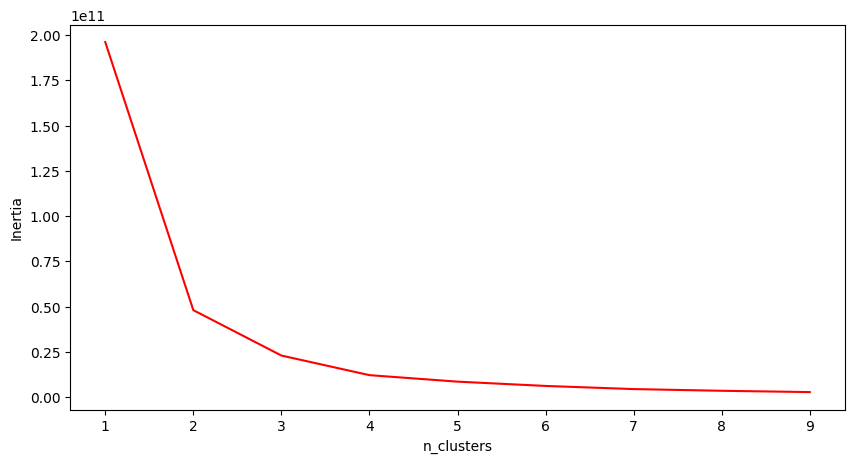

In [44]:
# Mententukan jumlah k cluster dengan Elbow Analysis
from sklearn.cluster import KMeans

score = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    label = kmeans.fit_predict(features)
    
    score.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 10), score, 'r-')
plt.ylabel('Inertia')
plt.xlabel('n_clusters')

In [45]:
kmeans = KMeans(n_clusters=2,init='k-means++',
               max_iter=300,n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features)
ins1['cluster'] = pd.DataFrame(pred_y)
ins1

,age,bmi,smoker,children,region,charges,cluster
0,19,27.900,1,0,0,16884.92400,0
1,18,33.770,0,1,1,1725.55230,0
2,28,33.000,0,3,1,4449.46200,0
3,33,22.705,0,0,2,21984.47061,0
4,32,28.880,0,0,2,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,30.970,0,3,2,10600.54830,0
1334,18,31.920,0,0,3,2205.98080,0
1335,18,36.850,0,0,1,1629.83350,0
1336,21,25.800,0,0,0,2007.94500,0


In [46]:
features[pred_y==0,0]

array([19., 18., 28., ..., 18., 18., 21.])

In [47]:
features[pred_y==0,1]

array([27.9 , 33.77, 33.  , ..., 31.92, 36.85, 25.8 ])

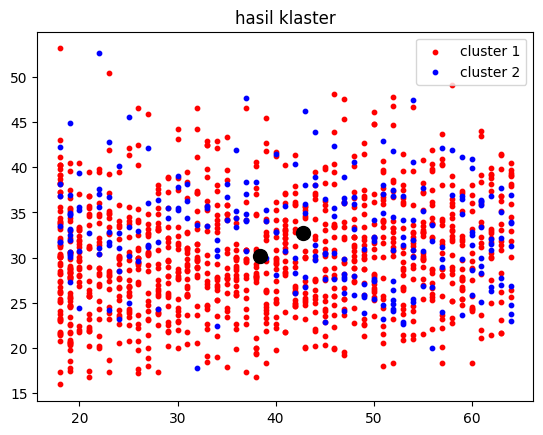

In [48]:
#Membuat plot hasil pembagian cluster
plt.scatter(features[pred_y==0,0],features[pred_y==0,1],
            s=10,c='red',label='cluster 1')
plt.scatter(features[pred_y==1,0],features[pred_y==1,1],
            s=10,c='blue',label='cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100, c="black")
plt.title("hasil klaster")
plt.legend()
plt.show()

# membuat model klasifikasi data  dengan ANN

In [49]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

1. Membangun model Sequential

Objek model Sequential digunakan untuk membangun model ANN secara berurutan, dengan lapisan-lapisan yang ditambahkan satu per satu.

2. Menambahkan layer Dense:
Fungsi 'model.add(Dense(...))' digunakan untuk menambahkan lapisan Dense ke model. Argumen pertama menentukan jumlah unit/neuron dalam lapisan tersebut. Argumen 'activation' menentukan fungsi aktivasi yang akan digunakan di lapisan tersebut. Pada lapisan pertama, kita juga harus menentukan input_shape yang merupakan dimensi masukan pertama. Dalam contoh di atas, 'input_shape' adalah (16,), yang berarti dimensi masukan adalah 16.

3. Mengompilasi model
Fungsi 'model.compile()' digunakan untuk mengompilasi model dengan menentukan fungsi loss, optimizer, dan metrik evaluasi. Dalam contoh di atas, kita menggunakan 'categorical_crossentropy' sebagai fungsi loss karena kita memiliki 7 kelas output yang dienkod secara kategorikal. Optimizer yang digunakan adalah 'adam', dan metrik evaluasi yang digunakan adalah 'accuracy'.

4. Menampilkan ringkasan model:
Fungsi 'model.summary()' digunakan untuk menampilkan ringkasan dari model yang telah dibangun, termasuk jumlah parameter yang dapat diatur dalam setiap lapisan dan jumlah total parameter dalam model.

Demikianlah penjelasan tentang fungsi sintaks yang digunakan untuk membangun model ANN dengan beberapa layer Dense.

In [50]:
#Membangun model ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16,activation='relu', input_shape=(5,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='sigmoid')) 
# gunakan softmax: output > 1,
# gunakan sigmoid: output = 1 
model.compile(loss ='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,898
Trainable params: 4,898
Non-trainable params: 0
_________________________________________________________________


1. Membuat objek EarlyStopping:
Objek 'early_stopping' dari kelas 'EarlyStopping' digunakan untuk memberikan kriteria berhenti awal pada pelatihan model. Argumen monitor menentukan metrik yang akan dipantau untuk menentukan kapan pelatihan harus dihentikan. Dalam contoh ini, pelatihan akan berhenti jika tidak ada peningkatan dalam akurasi validasi ('val_accuracy') dalam 20 epoch berturut-turut. Argumen 'restore_best_weights=True' mengatur agar bobot model akan dikembalikan ke bobot terbaik yang ditemukan selama pelatihan.

2. Melakukan pelatihan model dengan Early Stopping:
Fungsi 'model.fit()' digunakan untuk melatih model. Argumen 'X_train' dan 'y_train' adalah data latihan yang digunakan untuk pelatihan. Argumen 'epochs' menentukan jumlah epoch atau iterasi pelatihan. Argumen 'batch_size' menentukan ukuran batch yang digunakan dalam pelatihan. Argumen 'validation_data' berisi data validasi yang digunakan untuk memantau kinerja model selama pelatihan. Argumen 'callbacks' digunakan untuk menyertakan objek 'early_stopping' yang memberikan Early Stopping.

Selama pelatihan, jika tidak ada peningkatan dalam akurasi validasi selama 20 epoch berturut-turut, pelatihan akan dihentikan dan bobot model akan dikembalikan ke bobot terbaik yang ditemukan. Riwayat pelatihan akan disimpan dalam variabel history.

In [51]:
#mencari model terbaik
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/100
24/24 [==============================] - 2s 14ms/step - loss: 0.6596 - accuracy: 0.6723 - val_loss: 0.5999 - val_accuracy: 0.7934
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5250 - accuracy: 0.8314 - val_loss: 0.4106 - val_accuracy: 0.8670
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.3357 - accuracy: 0.8791 - val_loss: 0.2277 - val_accuracy: 0.9249
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2100 - accuracy: 0.9369 - val_loss: 0.1406 - val_accuracy: 0.9624
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1520 - accuracy: 0.9617 - val_loss: 0.1106 - val_accuracy: 0.9687
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1264 - accuracy: 0.9704 - val_loss: 0.0933 - val_accuracy: 0.9750
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1102 - accuracy: 0.9725 - val_loss: 0.0841 - val_accuracy: 0.9797
Epoch 8/100


In [52]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [53]:
evaluation = model.evaluate(x_test, y_test)

20/20 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9828


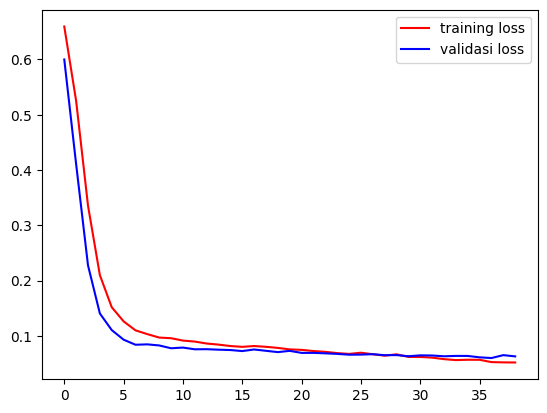

In [54]:
#Berikut visuaisasi Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss,'r', label = 'training loss')
plt.plot(val_loss,'b', label = 'validasi loss')
plt.legend()

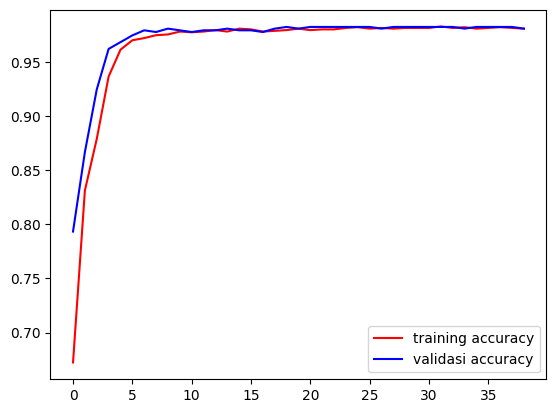

In [55]:
#Berikut visuaisasi Akurasinya
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc,'r', label = 'training accuracy')
plt.plot(val_acc,'b', label = 'validasi accuracy')
plt.legend()

In [56]:
Y_pred = np.argmax(model.predict(x_test),axis=1)

20/20 [==============================] - 0s 1ms/step


In [57]:
Y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [58]:
Y_test = np.argmax(y_test,axis=1)
Y_test

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [59]:
from sklearn.metrics import accuracy_score
print ('accuracy_score: ',accuracy_score(Y_test,Y_pred))

accuracy_score:  0.9827856025039123


In [60]:
#evaluasi model klasifikasi dengan confusion matrix
from sklearn.metrics import confusion_matrix
model = confusion_matrix(Y_test, Y_pred)
model

array([[311,  11],
       [  0, 317]])

In [61]:
print('Accuracy: %.5f' % accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.98279
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       322
           1       0.97      1.00      0.98       317

    accuracy                           0.98       639
   macro avg       0.98      0.98      0.98       639
weighted avg       0.98      0.98      0.98       639

